In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imshow(titles=None, images=None, size=5):
    '''This function plots 1 or more images read by OpenCV'''
    # If titles and images are not lists, convert them to lists
    if not isinstance(titles, list):
        titles = [titles]
    if not isinstance(images, list):
        images = [images]

    num_images = len(images)

    # Create a subplot with the desired number of columns
    fig, axes = plt.subplots(1, num_images, figsize=(size * num_images, size))

    # Ensure axes is always treated as a list
    if num_images == 1:
        axes = [axes]

    # Iterate through titles and images to display them
    for i in range(num_images):
        w, h = images[i].shape[0], images[i].shape[1]
        aspect_ratio = w / h
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(titles[i])
       # axes[i].axis('off')  # Turn off axis labels

    plt.show()

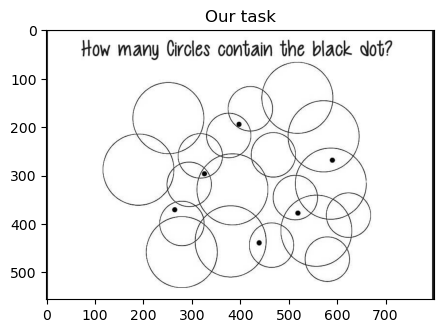

In [8]:
# Read the image
img = cv2.imread('circles_img.png')
imshow('Our task', img)

In [9]:
# No need for preprocessing, the image is already clear and in 2 scale color

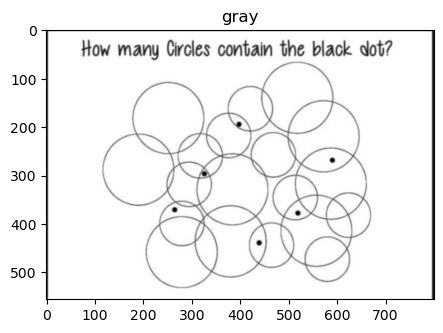

In [13]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply GaussianBlur to reduce noise and improve circle detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
imshow('gray', blurred)


In [14]:
# Use Hough Circle Transform to detect circles
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,  # Inverse ratio of the accumulator resolution
    minDist=50,  # Minimum distance between detected centers
    param1=100,  # Upper threshold for the Canny edge detector
    param2=30,   # Threshold for center detection
    minRadius=10,  # Minimum radius
    maxRadius=50   # Maximum radius
)

In [21]:






if circles is not None:
    # Convert the (x, y) coordinates and radius of the circles to integers
    circles = np.uint16(np.around(circles))

    # Draw the circles on the original image
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2]

        # Extract the region of interest around the detected circle
        roi = img[i[1]-radius:i[1]+radius, i[0]-radius:i[0]+radius]

        # Check if the ROI contains a black dot
        if np.mean(roi) < 110:  # Adjust the threshold based on your image
            cv2.circle(img, center, radius, (0, 255, 0), 2)

# Display the result

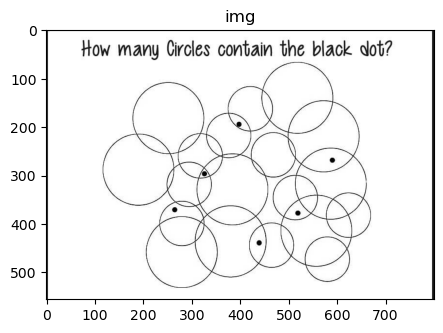

In [22]:
imshow('img', img)

In [24]:
image = img.copy()

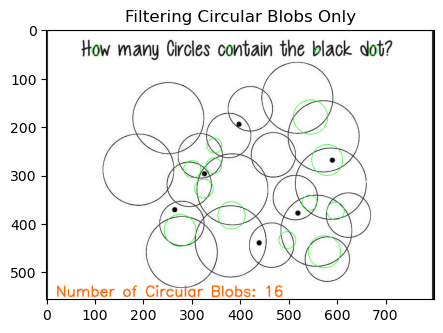

In [34]:

# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

#
params.filterByColor = True
params.blobColor = 255 
# Set Area filtering parameters
# params.filterByArea = True
# params.minArea = 100

# # Set Circularity filtering parameters
# params.filterByCircularity = True 
# params.minCircularity = 0.9

# # Set Convexity filtering parameters
# params.filterByConvexity = False
# params.minConvexity = 0.2
    
# # Set inertia filtering parameters
# params.filterByInertia = True
# params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)


# Draw detected blobs on the original image
result_image = cv2.drawKeypoints(image, keypoints, np.array([]), (0, 0, 255),
                                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


# Draw blobs on our image as red circles
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)

In [38]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range you want to filter (here, blue color)
lower_color = np.array([100, 50, 50])  # Lower bound for blue color in HSV
upper_color = np.array([130, 255, 255])  # Upper bound for blue color in HSV

# Create a binary mask using the inRange function
color_mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Apply the color mask to the original image
filtered_image = cv2.bitwise_and(image, image, mask=color_mask)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Filter by color
params.filterByColor = True
params.blobColor = 255  # Blobs with this color will be detected

# Other parameters can be adjusted as needed

# Create the detector with the specified parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the filtered image
keypoints = detector.detect(image)

# Draw detected blobs on the original image
result_image = cv2.drawKeypoints(image, keypoints, np.array([]), (255, 0, 0),
                                  cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


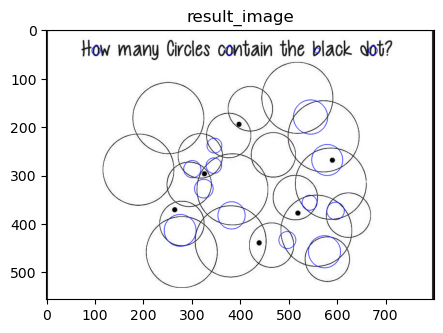

In [39]:
imshow('result_image', result_image)

In [61]:
image = img.copy()
# detect circles in the image
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT  , 1.2, 100)
# ensure at least some circles were found
if circles is not None:
	# convert the (x, y) coordinates and radius of the circles to integers
	circles = np.round(circles[0, :]).astype("int")
	# loop over the (x, y) coordinates and radius of the circles
	for (x, y, r) in circles:
		# draw the circle in the output image, then draw a rectangle
		# corresponding to the center of the circle
		cv2.circle(image, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

imshow("output", np.hstack([img, image]), 15)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2309: error: (-211:One of the arguments' values is out of range) when using HOUGH_GRADIENT_ALT method, param2 parameter must be smaller than 1.0 in function 'cv::HoughCircles'


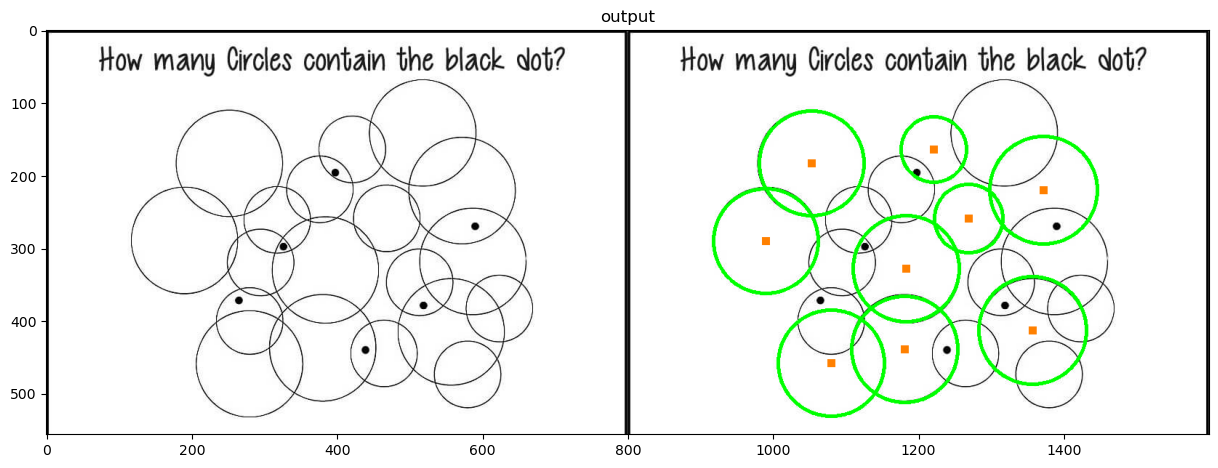

In [59]:
gray_save = gray.copy()

I apologize for the confusion. The cv2.HoughCircles function in OpenCV only supports two methods: HOUGH_GRADIENT and HOUGH_GRADIENT_ALT for circle detection. The HOUGH_STANDARD and HOUGH_PROBABILISTIC methods are not available for this function.

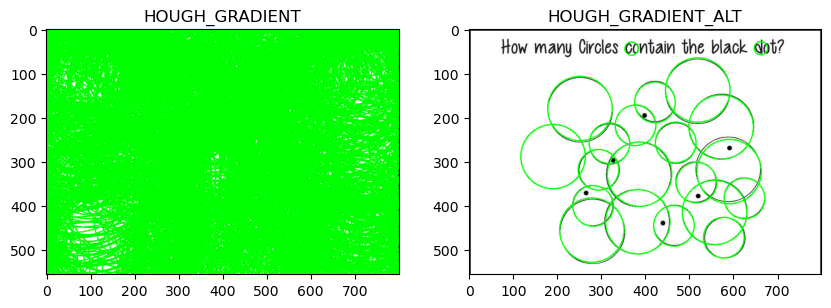

In [73]:
  # Define the parameters for HoughCircles
dp = 1.2  # Inverse ratio of the accumulator resolution to the image resolution
minDist = 10  # Minimum distance between the centers of detected circles
param1 = 80  # Upper threshold for the internal Canny edge detector
param2 = 0.9  # Threshold for center detection. The lower it is, the more false circles may be detected
minRadius = 0  # Minimum radius of the circles to be detected
maxRadius = 0  # Maximum radius of the circles to be detected

# # HOUGH_STANDARD
# circles_standard = cv2.HoughCircles(gray, cv2.HOUGH_STANDARD, dp, minDist)

# # HOUGH_PROBABILISTIC
# circles_probabilistic = cv2.HoughCircles(gray, cv2.HOUGH_PROBABILISTIC, dp, minDist, param1=param1, param2=param2)

# # HOUGH_MULTI_SCALE
# circles_multi_scale = cv2.HoughCircles(gray, cv2.HOUGH_MULTI_SCALE, dp, minDist)

# HOUGH_GRADIENT
circles_gradient = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# HOUGH_GRADIENT_ALT
circles_gradient_alt = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT_ALT, dp, minDist, param1=param1, param2=param2, minRadius=minRadius, maxRadius=maxRadius)

# Draw the detected circles on a copy of the original image
output_standard = image.copy()
output_probabilistic = image.copy()
output_multi_scale = image.copy()
output_gradient = image.copy()
output_gradient_alt = image.copy()

# if circles_standard is not None:
#     circles_standard = np.uint16(np.around(circles_standard))
#     for i in circles_standard[0, :]:
#         cv2.circle(output_standard, (i[0], i[1]), i[2], (0, 255, 0), 2)

# if circles_probabilistic is not None:
#     circles_probabilistic = np.uint16(np.around(circles_probabilistic))
#     for i in circles_probabilistic[0, :]:
#         cv2.circle(output_probabilistic, (i[0], i[1]), i[2], (0, 255, 0), 2)

# if circles_multi_scale is not None:
#     circles_multi_scale = np.uint16(np.around(circles_multi_scale))
#     for i in circles_multi_scale[0, :]:
#         cv2.circle(output_multi_scale, (i[0], i[1]), i[2], (0, 255, 0), 2)

if circles_gradient is not None:
    circles_gradient = np.uint16(np.around(circles_gradient))
    for i in circles_gradient[0, :]:
        cv2.circle(output_gradient, (i[0], i[1]), i[2], (0, 255, 0), 2)

if circles_gradient_alt is not None:
    circles_gradient_alt = np.uint16(np.around(circles_gradient_alt))
    for i in circles_gradient_alt[0, :]:
        cv2.circle(output_gradient_alt, (i[0], i[1]), i[2], (0, 255, 0), 2)

imshow(['HOUGH_GRADIENT', 'HOUGH_GRADIENT_ALT'], [output_gradient, output_gradient_alt])

In [74]:
circles_gradient_alt

array([[[190, 289,  73],
        [278, 456,  73],
        [251, 180,  73],
        [518, 138,  73],
        [386, 329,  73],
        [589, 323,  73],
        [556, 416,  73],
        [382, 437,  73],
        [571, 222,  73],
        [577, 473,  46],
        [515, 348,  46],
        [624, 384,  46],
        [421, 166,  46],
        [464, 446,  46],
        [468, 257,  46],
        [377, 218,  46],
        [318, 259,  46],
        [293, 319,  46],
        [281, 401,  46],
        [368,  44,  15],
        [661,  43,  15]]], dtype=uint16)

In [75]:
sorted_cicrcles = sorted(circles_gradient_alt, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = circles_gradient_alt[1]

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:315: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::contourArea'


In [ ]:
The output of cv2.HoughCircles is a 3D NumPy array, and it seems you want to sort the circles based on their radii and get rid of the two smallest circles. You can achieve this by extracting the radii of the circles, sorting them, and then selecting the circles with the larger radii.

Here's how you can do it:

python
Copy code
import cv2
import numpy as np

# Your circles_gradient_alt array
circles_gradient_alt = np.array([[[190, 289,  73],
                                  [278, 456,  73],
                                  # ... (other circles)
                                  [661,  43,  15]]], dtype=np.uint16)

# Extract radii from circles_gradient_alt
radii = circles_gradient_alt[0, :, 2]

# Sort the radii in descending order
sorted_radii_indices = np.argsort(radii)[::-1]

# Keep the circles with the largest radii (excluding the two smallest)
num_circles_to_keep = min(2, len(sorted_radii_indices) - 2)
selected_indices = sorted_radii_indices[:num_circles_to_keep]

# Extract the circles with the largest radii
selected_circles = circles_gradient_alt[0, selected_indices]

# Display the selected circles
for circle in selected_circles:
    center = (circle[0], circle[1])
    radius = circle[2]
    cv2.circle(output_gradient_alt, center, radius, (0, 255, 0), 2)

# Display the result
cv2.imshow('Selected Circles', output_gradient_alt)
cv2.waitKey(0)
cv2.destroyAllWindows()